# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [14]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [15]:
# !python --version

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [17]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,93,94,48,87,162,64,10,157,43,20,161,179,363,186,75,4,15,184,195
1,505,115,53,100,205,64,11,220,30,25,166,229,710,214,71,21,11,189,199
2,845,85,36,66,123,55,5,120,56,17,128,140,212,131,73,1,18,186,190
3,361,101,46,105,195,61,10,198,34,23,150,213,578,195,66,7,38,192,205
4,237,85,45,65,128,56,8,151,45,19,145,170,332,186,81,1,10,179,184
5,533,89,41,63,134,59,6,123,55,17,137,148,223,150,76,12,3,186,188
6,667,110,53,104,223,66,10,211,32,24,164,223,659,210,67,5,16,190,203
7,407,91,38,75,136,53,6,144,47,19,131,165,305,149,69,1,7,186,191
8,274,107,57,106,179,51,8,257,26,28,172,275,954,232,83,2,20,181,184
9,7,90,43,66,157,65,9,137,48,18,146,162,281,164,67,3,3,193,202


Methods `describe` and `info` deliver some useful information.

In [18]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,421.699454,93.775956,45.01275,82.138434,169.693989,61.785064,8.661202,169.147541,40.857923,20.612022,148.358834,189.107468,441.746812,175.524590,72.402550,6.495446,12.247723,189.065574,195.765027
std,241.231321,8.367194,6.23431,15.782248,33.948237,8.196786,4.784209,33.355338,7.873651,2.600660,14.588536,31.739320,176.806948,32.626478,7.732295,4.980480,8.891716,6.240853,7.528376
min,2.000000,73.000000,33.00000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,182.000000
25%,220.000000,88.000000,40.00000,70.000000,142.000000,57.000000,7.000000,146.000000,33.000000,19.000000,138.000000,167.000000,319.000000,150.000000,67.000000,2.000000,5.000000,184.000000,190.000000
50%,421.000000,93.000000,45.00000,80.000000,168.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.000000,174.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,624.000000,100.000000,50.00000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,199.000000,76.000000,10.000000,18.000000,193.000000,201.000000
max,845.000000,119.000000,59.00000,112.000000,333.000000,138.000000,52.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [19]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


In [20]:
y_train_pd = pd.DataFrame(y_train)
y_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       549 non-null    object
dtypes: object(1)
memory usage: 4.4+ KB


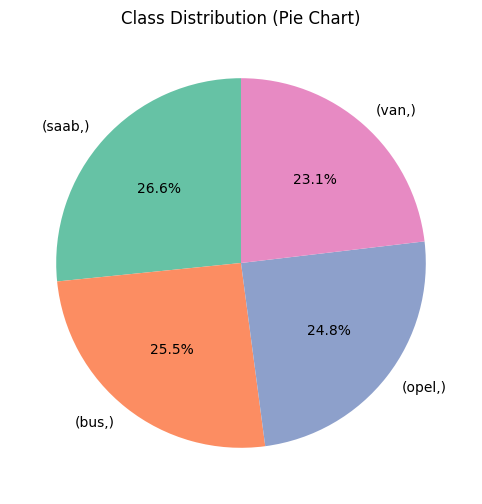

In [21]:
# Check the distribution of the target variable
import seaborn as sns
import matplotlib.pyplot as plt
class_counts = y_train_pd.value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(class_counts)))
plt.title('Class Distribution (Pie Chart)')
plt.ylabel('')  # Hide the label for better aesthetics
plt.show()

### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [22]:
### YOUR CODE HERE

from sklearn.preprocessing import LabelEncoder

# Encode the target labels (saab, bus, van, opel) to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Check the first few encoded values
print(y_train_encoded[:10])

[3 2 3 2 0 3 2 2 0 3]


In [ ]:
from sklearn.preprocessing import StandardScaler
'''
For logistic regression and other distance-based models, we often scale the features.
Scaling makes the feature distributions more comparable, helping prevent some features 
from dominating others due to their different scales.
So I  used StandardScaler here to standardize our features. 
It centers the mean of the data at zero and scales the data to have unit variance.
'''
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [25]:
# !pip install scikit-plot

LogisticRegression(C=10, max_iter=500, multi_class='multinomial', solver='saga',
                   tol=0.001)
Best parameters: {'C': 10}
Best cross-validation score: 0.7923
Accuracy: 0.8047
F1 Score: 0.8026


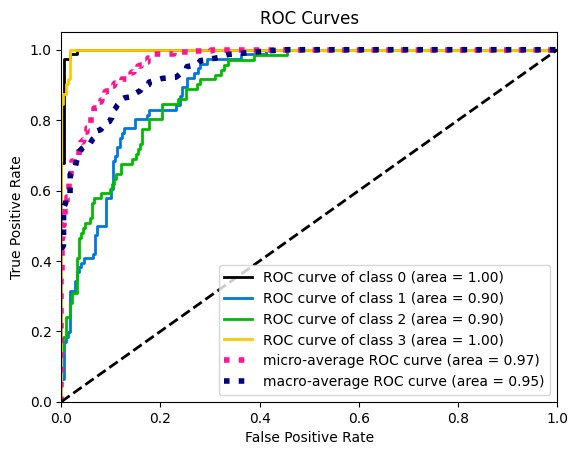

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score
import scikitplot as skplt
import matplotlib.pyplot as plt

import warnings

# Disable specific FutureWarning related to 'multi_class'
warnings.filterwarnings("ignore", category=FutureWarning, message=".*multi_class.*")

# Logistic Regression with cross-validation for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10]}  # Regularization strength
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train_encoded)

# Best parameters and model evaluation
best_model = grid_search.best_estimator_
print(best_model)
y_pred = best_model.predict(X_test_scaled)

# Accuracy and F1 scores 
accuracy = accuracy_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred, average='weighted')

# Output best hyperparameters and the performance of the corresponding model
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

# Evaluate the model with the best parameters

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

# ROC Curve
y_pred_proba = best_model.predict_proba(X_test_scaled)
skplt.metrics.plot_roc(y_test_encoded, y_pred_proba)
plt.show()

In [27]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

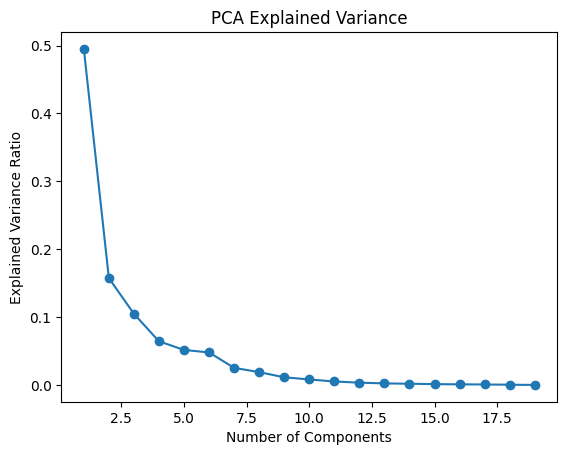

In [28]:
### YOUR CODE HERE

from sklearn.decomposition import PCA 

# Apply PCA to reduce dimensionality to x components

pca = PCA(n_components=19)

X_train_pca = pca.fit_transform(X_train_scaled)

# Explained variance plot
plt.plot(range(1, 20), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [29]:
### YOUR CODE HERE
# Choose number of components
n_components = 10

# Apply PCA with the chosen number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original shape: {X_train_scaled.shape}")
print(f"PCA transformed shape: {X_train_pca.shape}")

Original shape: (549, 19)
PCA transformed shape: (549, 10)


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

LogisticRegression(C=0.1, max_iter=500, multi_class='multinomial',
                   solver='saga', tol=0.001)
Best parameters: {'C': 0.1}
Best cross-validation score: 0.6957
Accuracy: 0.7172
F1 Score: 0.7012


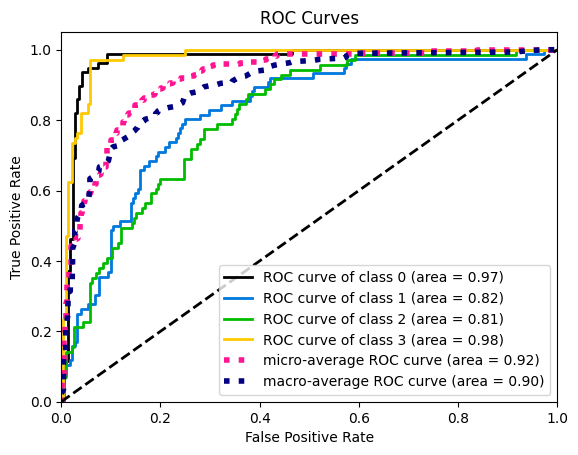

In [ ]:
### YOUR CODE HERE

# Logistic Regression with cross-validation for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10]}  # Regularization strength

# Logistic Regression on PCA-transformed data
log_reg_pca = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)


grid_search = GridSearchCV(log_reg_pca, param_grid, cv=5)
grid_search.fit(X_train_pca, y_train_encoded)

# Best parameters and model evaluation
best_model = grid_search.best_estimator_
print(best_model)
y_pred_pca = best_model.predict(X_test_pca)

# Accuracy and F1 scores
accuracy = accuracy_score(y_test_encoded, y_pred_pca)
f1 = f1_score(y_test_encoded, y_pred_pca, average='weighted')

# Output best hyperparameters and the performance of the corresponding model
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

# Evaluate the model with the best parameters

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

# ROC Curve
y_pred_proba = best_model.predict_proba(X_test_pca)
skplt.metrics.plot_roc(y_test_encoded, y_pred_proba)
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [31]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

# Cross-validation to find optimal tree depth
param_grid_tree = {'max_depth': [3, 5, 10, 15, 20, None]}  # Possible depths
dtree = DecisionTreeClassifier(random_state=42)

grid_search_tree = GridSearchCV(dtree, param_grid_tree, cv=5)
grid_search_tree.fit(X_train_scaled, y_train_encoded)

# Best decision tree model and evaluation
best_tree_model = grid_search_tree.best_estimator_
y_pred_tree = best_tree_model.predict(X_test_scaled)

accuracy_tree = accuracy_score(y_test_encoded, y_pred_tree)
f1_tree = f1_score(y_test_encoded, y_pred_tree, average='weighted')

print(f"Accuracy (Decision Tree): {accuracy_tree:.4f}")
print(f"F1 Score (Decision Tree): {f1_tree:.4f}")

Accuracy (Decision Tree): 0.6633
F1 Score (Decision Tree): 0.6174


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

/home/andrej/study/girafe/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/andrej/study/girafe/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/andrej/study/girafe/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/andrej/study/girafe/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/andrej/study/girafe/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/andrej/study/g

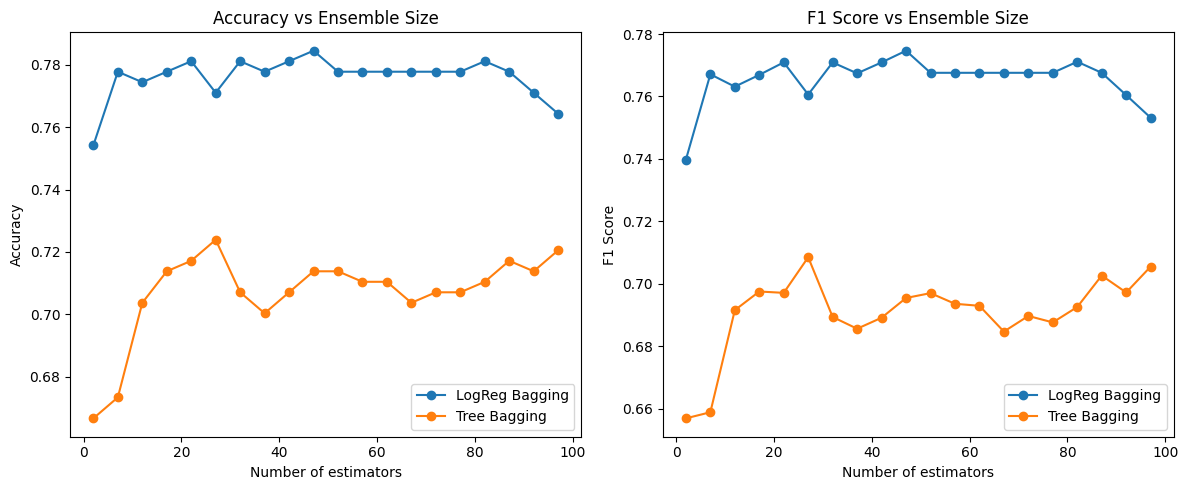

In [46]:
# YOUR CODE HERE

# Bagging для логистической регрессии и деревьев решений
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt

# Размеры ансамблей для проверки
n_estimators_range = list(range(2, 101, 5))

# Метрики для каждого размера ансамбля
accuracies_bagging_log = []
f1_scores_bagging_log = []
accuracies_bagging_tree = []
f1_scores_bagging_tree = []

# Базовые модели с оптимальными гиперпараметрами
base_log_reg = LogisticRegression(C=grid_search.best_params_['C'], 
                                  multi_class='multinomial', 
                                  solver='saga', 
                                  tol=1e-3, 
                                  max_iter=500)
                                  
base_tree = DecisionTreeClassifier(max_depth=grid_search_tree.best_params_['max_depth'],
                                  random_state=42)

# Обучение и оценка для разных размеров ансамбля
for n_est in n_estimators_range:
    # Bagging с логистической регрессией
    bagging_log = BaggingClassifier(estimator=base_log_reg, 
                                    n_estimators=n_est, 
                                    random_state=42)
    bagging_log.fit(X_train_scaled, y_train_encoded)
    y_pred_log = bagging_log.predict(X_test_scaled)
    accuracies_bagging_log.append(accuracy_score(y_test_encoded, y_pred_log))
    f1_scores_bagging_log.append(f1_score(y_test_encoded, y_pred_log, average='weighted'))
    
    # Bagging с деревьями решений
    bagging_tree = BaggingClassifier(estimator=base_tree, 
                                    n_estimators=n_est, 
                                    random_state=42)
    bagging_tree.fit(X_train_scaled, y_train_encoded)
    y_pred_tree = bagging_tree.predict(X_test_scaled)
    accuracies_bagging_tree.append(accuracy_score(y_test_encoded, y_pred_tree))
    f1_scores_bagging_tree.append(f1_score(y_test_encoded, y_pred_tree, average='weighted'))

# Построение графиков
plt.figure(figsize=(12, 5))

# График точности
plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, accuracies_bagging_log, 'o-', label='LogReg Bagging')
plt.plot(n_estimators_range, accuracies_bagging_tree, 'o-', label='Tree Bagging')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Ensemble Size')
plt.legend()

# График F1-score
plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, f1_scores_bagging_log, 'o-', label='LogReg Bagging')
plt.plot(n_estimators_range, f1_scores_bagging_tree, 'o-', label='Tree Bagging')
plt.xlabel('Number of estimators')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Ensemble Size')
plt.legend()

plt.tight_layout()
plt.show()

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

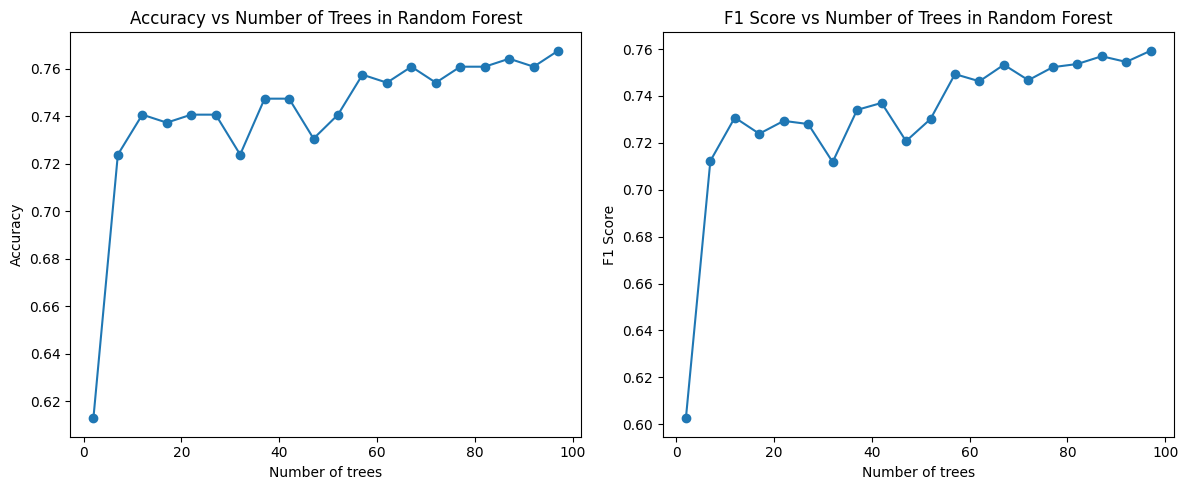

In [47]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

# Размеры Random Forest для проверки
n_estimators_range = list(range(2, 101, 5))

# Метрики для каждого размера ансамбля
accuracies_rf = []
f1_scores_rf = []

# Обучение и оценка для разных размеров Random Forest
for n_est in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n_est, random_state=42)
    rf.fit(X_train_scaled, y_train_encoded)
    y_pred = rf.predict(X_test_scaled)
    accuracies_rf.append(accuracy_score(y_test_encoded, y_pred))
    f1_scores_rf.append(f1_score(y_test_encoded, y_pred, average='weighted'))

# Построение графиков
plt.figure(figsize=(12, 5))

# График точности
plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, accuracies_rf, 'o-', label='Random Forest')
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Trees in Random Forest')

# График F1-score
plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, f1_scores_rf, 'o-', label='Random Forest')
plt.xlabel('Number of trees')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Number of Trees in Random Forest')

plt.tight_layout()
plt.show()

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

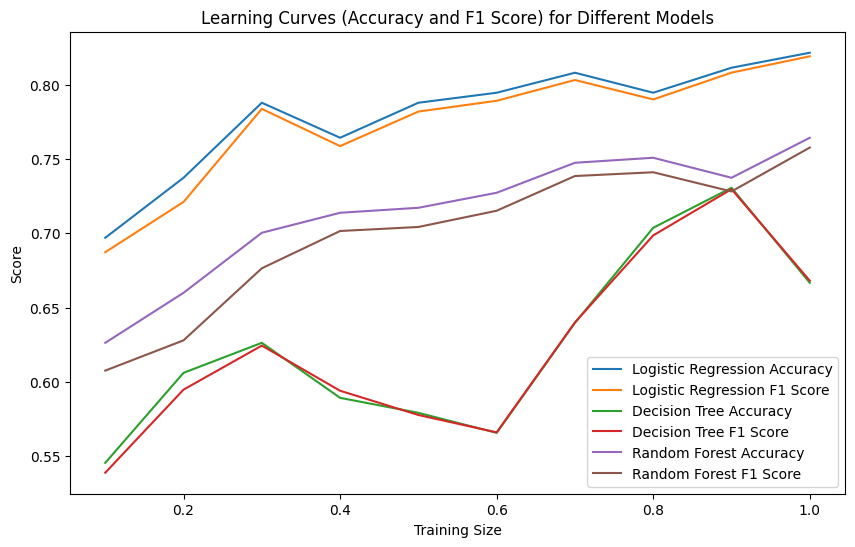

In [34]:
# YOUR CODE HERE

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Define the train sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Store the accuracy and f1 scores for each model
accuracies_logreg = []
f1_scores_logreg = []
accuracies_tree = []
f1_scores_tree = []
accuracies_rf = []
f1_scores_rf = []

for train_size in train_sizes:
    # Create train-test splits manually
    size = int(train_size * len(X_train_scaled))  # Calculate the number of samples for this train size
    # print(size)
    X_train_subset = X_train_scaled[:size]
    # print(len(X_train_subset)
    y_train_subset = y_train_encoded[:size]
    
    # Train Logistic Regression
    model_logreg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
    model_logreg.fit(X_train_subset, y_train_subset)
    y_pred_logreg = model_logreg.predict(X_test_scaled)
    accuracies_logreg.append(accuracy_score(y_test_encoded, y_pred_logreg))
    f1_scores_logreg.append(f1_score(y_test_encoded, y_pred_logreg, average='weighted'))
    
    # Train Decision Tree
    model_tree = DecisionTreeClassifier(random_state=42)
    model_tree.fit(X_train_subset, y_train_subset)
    y_pred_tree = model_tree.predict(X_test_scaled)
    accuracies_tree.append(accuracy_score(y_test_encoded, y_pred_tree))
    f1_scores_tree.append(f1_score(y_test_encoded, y_pred_tree, average='weighted'))
    
    # Train Random Forest
    model_rf = RandomForestClassifier(random_state=42)
    model_rf.fit(X_train_subset, y_train_subset)
    y_pred_rf = model_rf.predict(X_test_scaled)
    accuracies_rf.append(accuracy_score(y_test_encoded, y_pred_rf))
    f1_scores_rf.append(f1_score(y_test_encoded, y_pred_rf, average='weighted'))

# Plot learning curves
plt.figure(figsize=(10, 6))

plt.plot(train_sizes, accuracies_logreg, label='Logistic Regression Accuracy')
plt.plot(train_sizes, f1_scores_logreg, label='Logistic Regression F1 Score')

plt.plot(train_sizes, accuracies_tree, label='Decision Tree Accuracy')
plt.plot(train_sizes, f1_scores_tree, label='Decision Tree F1 Score')

plt.plot(train_sizes, accuracies_rf, label='Random Forest Accuracy')
plt.plot(train_sizes, f1_scores_rf, label='Random Forest F1 Score')

plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.title('Learning Curves (Accuracy and F1 Score) for Different Models')
plt.show()

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

In [35]:
# !pip install xgboost

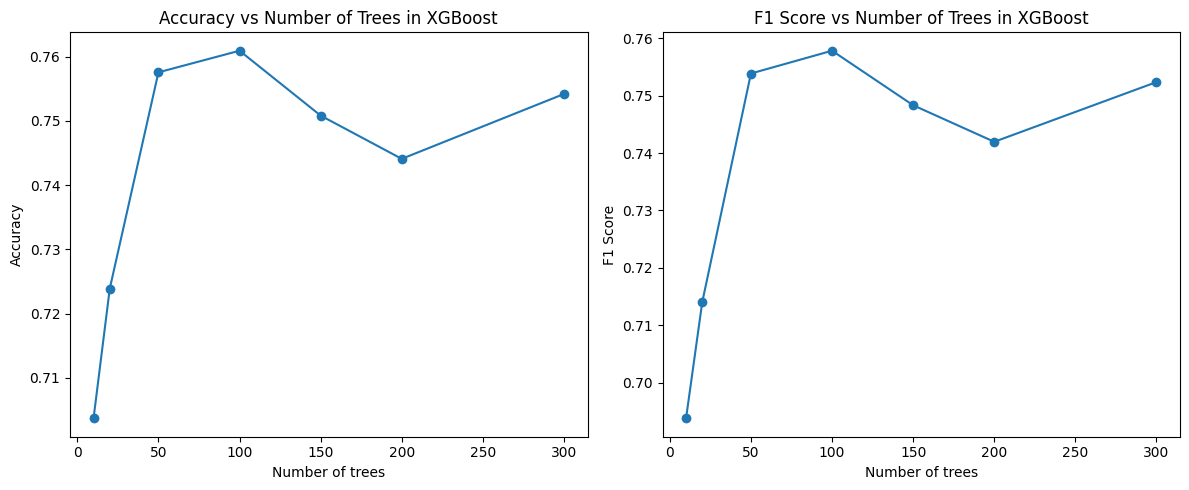

Оптимальное число деревьев для XGBoost: 100


In [48]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Диапазон числа деревьев для XGBoost
n_estimators_range = [10, 20, 50, 100, 150, 200, 300]

# Метрики для каждого размера ансамбля
accuracies_xgb = []
f1_scores_xgb = []

# Обучение и оценка для разных размеров XGBoost
for n_est in n_estimators_range:
    xgb_model = xgb.XGBClassifier(
        objective='multi:softmax', 
        num_class=4, 
        n_estimators=n_est,
        learning_rate=0.1,
        random_state=42
    )
    xgb_model.fit(X_train_scaled, y_train_encoded)
    y_pred = xgb_model.predict(X_test_scaled)
    accuracies_xgb.append(accuracy_score(y_test_encoded, y_pred))
    f1_scores_xgb.append(f1_score(y_test_encoded, y_pred, average='weighted'))

# Построение графиков
plt.figure(figsize=(12, 5))

# График точности
plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, accuracies_xgb, 'o-')
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Trees in XGBoost')

# График F1-score
plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, f1_scores_xgb, 'o-')
plt.xlabel('Number of trees')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Number of Trees in XGBoost')

plt.tight_layout()
plt.show()

# Определение оптимального числа деревьев
optimal_n_estimators = n_estimators_range[np.argmax(f1_scores_xgb)]
print(f"Оптимальное число деревьев для XGBoost: {optimal_n_estimators}")